This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [2]:
to_track = []
result_futures = {}
start_knot = 31 #Must be unique number for every run on Cloudknot.

frames = 651
fps = 100.02
umppx = 0.07

folder = '09_26_18_tissue_study' #Folder in AWS S3 containing files to be analyzed
bucket = 'hpontes.data'
vids = 5
types = ['10K', '1K', '5K', 'COOH']
slices = [1, 2, 3]

for typ in types:
    for slic in slices:
        for num in range(1, vids+1):
            #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
            to_track.append('{}_tissue_S{}_XY{}'.format(typ, slic, num))

In [3]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
    #                                                         remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with 10K_tissue_S1_XY1
Done with 10K_tissue_S1_XY2
Done with 10K_tissue_S1_XY3
Done with 10K_tissue_S1_XY4
Done with 10K_tissue_S1_XY5
Done with 10K_tissue_S2_XY1
Done with 10K_tissue_S2_XY2
Done with 10K_tissue_S2_XY3
Done with 10K_tissue_S2_XY4
Done with 10K_tissue_S2_XY5
Done with 10K_tissue_S3_XY1
Done with 10K_tissue_S3_XY2
Done with 10K_tissue_S3_XY3
Done with 10K_tissue_S3_XY4
Done with 10K_tissue_S3_XY5
Done with 1K_tissue_S1_XY1
Done with 1K_tissue_S1_XY2
Done with 1K_tissue_S1_XY3
Done with 1K_tissue_S1_XY4
Done with 1K_tissue_S1_XY5
Done with 1K_tissue_S2_XY1
Done with 1K_tissue_S2_XY2
Done with 1K_tissue_S2_XY3
Done with 1K_tissue_S2_XY4
Done with 1K_tissue_S2_XY5
Done with 1K_tissue_S3_XY1
Done with 1K_tissue_S3_XY2
Done with 1K_tissue_S3_XY3
Done with 1K_tissue_S3_XY4
Done with 1K_tissue_S3_XY5
Done with 5K_tissue_S1_XY1
Done with 5K_tissue_S1_XY2
Done with 5K_tissue_S1_XY3
Done with 5K_tissue_S1_XY4
Done with 5K_tissue_S1_XY5
Done with 5K_tissue_S2_XY1
Done with 5K_

In [4]:
for typ in types:
    to_avg = []
    for sample in to_track:
        if typ in sample:
            to_avg.append(sample)
    
    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment='{}_tissue'.format(typ))

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

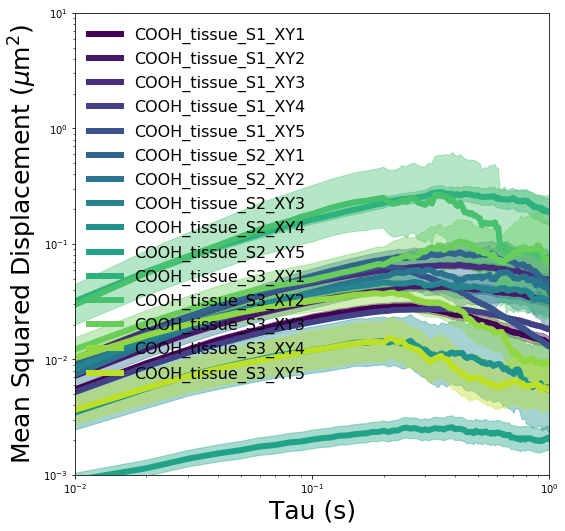

In [9]:
msd.plot_all_experiments(to_track[45:60], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

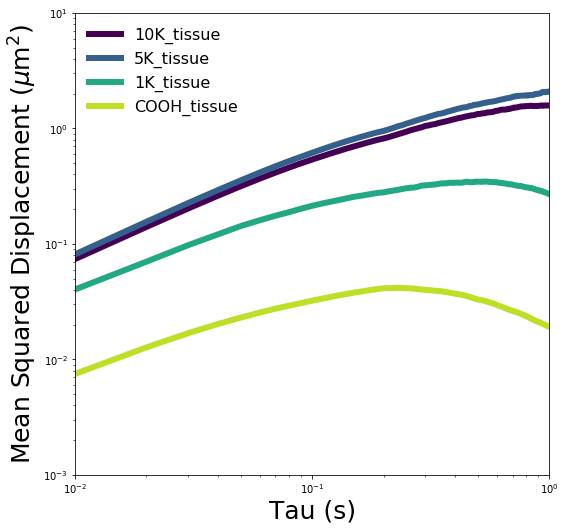

In [5]:
msd.plot_all_experiments(['10K_tissue', '5K_tissue', '1K_tissue', 'COOH_tissue'],
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)